In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def PrettyPrintBinary(state):
    outstr = ""
    if (type(state) == list and type(state[0]) == tuple):
        for i in range(len(state)):
            outstr += (str)(state[i][0])
            outstr += " |"
            outstr += state[i][1]
            outstr += "> "
            if (i < len(state) - 1):
                outstr += "+ "
        print(outstr)
    # elif (type(state) == list and type(state[0]) == np.float64):
    #     sto = 0
    #     for s in range(len(state)):
    #         if (len(bin(s)) > sto):
    #             sto = len(bin(s))
    #     print(sto)
    #     for s in range(len(state)):
    #         if(state[s] != 0):
    #             outstr += str(state[s])
    #             outstr += "|"
    #             addstr = str(bin(s))[2:]
    #             if (len(addstr) < sto - 2):
                    
    #             outstr += str(bin(s))[2:]
    #             outstr += "> "
    #     print(outstr)
    else:
        print("State is not valid")
def PrettyPrintInteger(state):
    if (type(state) == list):
        outstr = ""
        for i in range(len(state)):
            if (state[i] != 0):
                if (i != 0):
                    outstr += "+ "
                outstr += (str)(state[i])
                outstr += " |"
                outstr += str(i)
                outstr += "> "
                # if (i < len(state) - 1):
                #     outstr += "+ "
        print(outstr)
    else:
        print("State passed to PrettyPrintInteger is not valid")

def VecToDirac(myVec):
    if ((type(myVec) == list and len(myVec) % 2 == 0)):
        newState = []
        binlen = int(np.log2(len(myVec)))
        for i in range(len(myVec)):
            if (myVec[i] != 0):
                bi = bin(i)[2:].zfill(binlen)
                newState.append((myVec[i], bi))
        return newState
    else:
        print("Error in VecToDirac")
        
def DiracToVec(state):
    if (not (type(state) == list and type(state[0]) == tuple)):
        print("Error in DiracToVec")
    else:
        newVec = []
        for i in range(2**len(state[0][1])):
            newVec.append(0)
        for s in state:
            newVec[int(s[1], 2)] = s[0]
        return newVec
def ReadInputString(myInput_lines):
    myInput=[]
    myInput_lines=myInput_lines.split('\n')
    myInput_lines = [ i for i in myInput_lines if i!='']
    numberOfWires=int(myInput_lines[0])
    for line in myInput_lines[1:]:
        myInput.append(line.split())
    return (numberOfWires,myInput)

def GetStateFromFile(file):
    a = open(file).read()
    a.split("\n")
    print(a)


In [4]:
myState=[
  (-np.sqrt(0.125), '11' ),
  (np.sqrt(0.1), '00'),
  (np.sqrt(0.4), '01') ,
  (-np.sqrt(0.125), '11' )
]
myState2=[
   (np.sqrt(0.1)*1.j, '101'),
   (np.sqrt(0.5), '000') ,
   (-np.sqrt(0.4), '010' )]
myEquivilentState2 = [np.sqrt(0.5), 0, -np.sqrt(0.4), 0, 0, np.sqrt(0.1)*1.j, 0, 0]
PrettyPrintBinary(myState2)
PrettyPrintInteger(myEquivilentState2)
PrettyPrintBinary(VecToDirac(myEquivilentState2))
PrettyPrintInteger(DiracToVec(myState2))
PrettyPrintBinary(VecToDirac(DiracToVec(myState2)))

0.31622776601683794j |101> + 0.7071067811865476 |000> + -0.6324555320336759 |010> 
0.7071067811865476 |0> + -0.6324555320336759 |2> + 0.31622776601683794j |5> 
0.7071067811865476 |000> + -0.6324555320336759 |010> + 0.31622776601683794j |101> 
0.7071067811865476 |0> + -0.6324555320336759 |2> + 0.31622776601683794j |5> 
0.7071067811865476 |000> + -0.6324555320336759 |010> + 0.31622776601683794j |101> 


In [74]:
# Simulator S
class S:
    def H(wire, inputState):
        newState = []
        for s in inputState:
            if (s[1][wire] == '0'):
                bi = list(s[1])
                bi[wire] = '0'
                newState.append((s[0] * np.sqrt(1/2), "".join(bi)))
                bi[wire] = '1'
                newState.append((s[0] * np.sqrt(1/2), "".join(bi)))
            if (s[1][wire] == '1'):
                bi = list(s[1])
                bi[wire] = '0'
                newState.append((s[0] * np.sqrt(1/2), "".join(bi)))
                bi[wire] = '1'
                newState.append((s[0] * -np.sqrt(1/2), "".join(bi)))
        return newState

    def Phase(wire, theta, inputState):
        newState = []
        for s in inputState:
            if (s[1][wire] == '0'):
                newState.append(s)
            else:
                newState.append((s[0] * np.exp(1.j * theta), s[1]))
        return newState

    def CNOT(controlwire, notwire, inputState):
        newState = []
        for s in inputState:
            if (s[1][controlwire] == '0'):
                newState.append(s)
            else:
                bi = list(s[1])
                bi[notwire] = str((int(bi[notwire]) + 1) % 2)
                # if (bi[notwire] == '0'):
                #     print("here")
                #     bi[notwire] == '1'
                # else:
                #     bi[notwire] == '0'
                string = "".join(bi)                
                newState.append((s[0], string))
        return newState
    
    def AddDuplicates(inputState):
        bidict = {}
        for s in inputState:
            if (s[1] in bidict):
                bidict[s[1]] += s[0]
            else:
                bidict[s[1]] = s[0]
        
        outstate = []
        for i in bidict.keys():
            if (not np.isclose(bidict[i], 0)):
                outstate.append((bidict[i], i))
        return outstate
    
    def measure(state):
        possibleStates = []
        probabilities = []
        for s in state:
            possibleStates.append(s[1])
            probabilities.append(s[0] * np.conjugate(s[0]))
        rng = np.random.default_rng()
        return rng.choice(possibleStates, p=np.real(probabilities))

    def ReadAndProcessString(input_lines):
        numberOfWires, inputGates = ReadInputString(input_lines)
        bin = ''
        for i in range(numberOfWires):
            bin += '0'
        currentState = [(1, bin)]
        for g in inputGates:
            if (g[0] == 'INITSTATE'):
                if (g[1] == 'BASIS'):
                    currentState[0] = (1, g[2][1:-2])
                if (g[1] == 'FILE'):
                    currentState = GetStateFromFile(g[2])
            if (g[0] == 'H'):
                currentState = S.H(int(g[1]), currentState)
            if (g[0] == 'P'):
                currentState = S.Phase(int(g[1]), float(g[2]), currentState)
            if (g[0] == 'CNOT'):
                currentState = S.CNOT(int(g[1]), int(g[2]), currentState)
            currentState = S.AddDuplicates(currentState)
            if (g[0] == 'MEASURE'):
                return S.measure(currentState)
        return currentState

: 

In [6]:
PrettyPrintBinary(S.H(0,myState2))
PrettyPrintBinary(myState2)
PrettyPrintBinary(S.Phase(1, np.pi, myState2))
PrettyPrintBinary(S.CNOT(0, 1, myState2))
PrettyPrintBinary(myState)
PrettyPrintBinary(S.AddDuplicates(myState2))
sampleInput = '''
3
H 1
H 2
P 2 0.3
CNOT 2 1
H 1
H 2
CNOT 2 0
'''
sampleInput2 = open('example.circuit').read()
input3 = open('rand.circuit').read()
numberOfWires,myInput=ReadInputString(sampleInput)
PrettyPrintBinary(S.ReadAndProcessString(sampleInput))
PrettyPrintBinary(S.ReadAndProcessString(sampleInput2))
PrettyPrintBinary(S.ReadAndProcessString(input3))

0.223606797749979j |001> + (-0-0.223606797749979j) |101> + 0.5000000000000001 |000> + 0.5000000000000001 |100> + -0.447213595499958 |010> + -0.447213595499958 |110> 
0.31622776601683794j |101> + 0.7071067811865476 |000> + -0.6324555320336759 |010> 
0.31622776601683794j |101> + 0.7071067811865476 |000> + (0.6324555320336759-7.745346429080775e-17j) |010> 
0.31622776601683794j |111> + 0.7071067811865476 |000> + -0.6324555320336759 |010> 
-0.3535533905932738 |11> + 0.31622776601683794 |00> + 0.6324555320336759 |01> + -0.3535533905932738 |11> 
0.31622776601683794j |101> + 0.7071067811865476 |000> + -0.6324555320336759 |010> 
(0.9776682445628033+0.14776010333066983j) |000> + (0.022331755437196954-0.14776010333066983j) |101> 
0.5000000000000001 |0000> + 0.5000000000000001 |0011> + (0.45022355117633855+0.21748276705561514j) |1100> + (0.45022355117633855+0.21748276705561514j) |1111> 
(0.14565796004368137+0.11348294333323139j) |00000> + (-0.00017826157500454298+0.08005459383129299j) |00010> + (0

A NOT gate is H P(pi) H


In [8]:
def TensorMe(listOfMatrices):
    current = listOfMatrices[0]
    for i in range(len(listOfMatrices) - 1):
        current = np.kron(current, listOfMatrices[i+1])
    return current
class MA:
    H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
    
    def Hadamard(i, k):
        """creates a hadamard array
        i: target wire
        k: number of wires"""
        arr = []
        for j in range(k):
            if j < i:
                arr.append(np.eye(2))
            if j == i:
                arr.append(MA.H)
            if j > i:
                arr.append(np.eye(2))
        return TensorMe(arr)
    def Phase(i, k, theta):
        """creates a phase matrix
        i: target wire
        k: number of wires
        theta: the phase to rotate by"""
        arr = []
        for j in range(k):
            if j < i:
                arr.append(np.eye(2))
            if j == i:
                arr.append(np.array([[1, 0], [0, np.exp(1.j * theta)]]))
            if j > i:
                arr.append(np.eye(2))
        return TensorMe(arr)
    def CNOT(controlwire, otherwire, totalwires):
        """creates a matrix for a CNOT gate
        controlwire: the control wire
        otherwire: the target wire (must be adjacent to control)
        totalwires: yeah"""
        if not((controlwire - 1 == otherwire) or (controlwire + 1 == otherwire)):
            raise(ValueError("Controlwire and otherwire must be adjacent"))
        arr = []
        hasntRun = True
        j = 0
        while j < totalwires:
            if (j == controlwire or j == otherwire) and hasntRun:
                t = np.eye(4)
                if (controlwire < otherwire):
                    t[:, [2, 3]] = t[:, [3, 2]] 
                else:
                    t[:, [0, 1]] = t[:, [1, 0]]
                arr.append(t)
                j = j + 1
                hasntRun = False
            elif j < controlwire:
                arr.append(np.eye(2))
            elif j > otherwire:
                arr.append(np.eye(2))
            j = j + 1
        return TensorMe(arr)
    
    def CreateCircutMatrix(input_lines):
        numberOfWires, inputGates = ReadInputString(input_lines)
        currentState = list(np.zeros(numberOfWires))
        ListOmatrices = []
        for g in inputGates:
            if (g[0] == 'H'):
                ListOmatrices.append(MA.Hadamard(int(g[1]), numberOfWires))
            if (g[0] == 'P'):
                ListOmatrices.append(MA.Phase(int(g[1]), numberOfWires, float(g[2])))
            if (g[0] == 'CNOT'):
                ListOmatrices.append(MA.CNOT(int(g[1]), int(g[2]), numberOfWires))
            
        TheMatrix = np.eye(2**numberOfWires)
        ListOmatrices = ListOmatrices[::-1]
        for m in ListOmatrices:
            TheMatrix = TheMatrix @ m
        return TheMatrix
        
            

In [34]:
class MB:
    H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
    
    def Hadamard(i, k, state):
        """creates a hadamard array
        i: target wire
        k: number of wires"""
        arr = []
        for j in range(k):
            if j < i:
                arr.append(np.eye(2))
            if j == i:
                arr.append(MA.H)
            if j > i:
                arr.append(np.eye(2))
        return TensorMe(arr) @ state
    def Phase(i, k, theta, state):
        """creates a phase matrix
        i: target wire
        k: number of wires
        theta: the phase to rotate by"""
        arr = []
        for j in range(k):
            if j < i:
                arr.append(np.eye(2))
            if j == i:
                arr.append(np.array([[1, 0], [0, np.exp(1.j * theta)]]))
            if j > i:
                arr.append(np.eye(2))
        return TensorMe(arr) @ state
    def CNOT(controlwire, otherwire, totalwires, state):
        """creates a matrix for a CNOT gate
        controlwire: the control wire
        otherwire: the target wire (must be adjacent to control)
        totalwires: yeah"""
        if not((controlwire - 1 == otherwire) or (controlwire + 1 == otherwire)):
            raise(ValueError("Controlwire and otherwire must be adjacent"))
        arr = []
        hasntRun = True
        j = 0
        while j < totalwires:
            if (j == controlwire or j == otherwire) and hasntRun:
                t = np.eye(4)
                if (controlwire < otherwire):
                    t[:, [2, 3]] = t[:, [3, 2]] 
                else:
                    t[:, [0, 1]] = t[:, [1, 0]]
                arr.append(t)
                j = j + 1
                hasntRun = False
            elif j < controlwire:
                arr.append(np.eye(2))
            elif j > otherwire:
                arr.append(np.eye(2))
            j = j + 1
        return TensorMe(arr) @ state
    
    def ReadAndRunCircuit(input_lines, startstate):
        numberOfWires, inputGates = ReadInputString(input_lines)
        currentState = startstate
        ListOmatrices = []
        for g in inputGates:
            # if (g[0] == 'INITSTATE'):
            #     if (g[1] == 'FILE'):
            #         currentState = GetStateFromFile(g[2])
            #     if (g[1] == 'BASIS'):
            #         currentState = 
            if (g[0] == 'H'):
                currentState = MB.Hadamard(int(g[1]), numberOfWires, currentState)
            if (g[0] == 'P'):
                currentState = MB.Phase(int(g[1]), numberOfWires, float(g[2]), currentState)
            if (g[0] == 'CNOT'):
                currentState = MB.CNOT(int(g[1]), int(g[2]), numberOfWires, currentState)
            if (g[0] == 'MEASURE'):
                print(currentState)
                return S.measure(VecToDirac(list(currentState)))
        return currentState

In [10]:
testState1 = list(np.zeros((16)))
testState1[12] = 1.0
ar = MA.CNOT(0, 1, 4)
PrettyPrintBinary(VecToDirac(testState1))
PrettyPrintBinary(VecToDirac(list(testState1@ar)))

1.0 |1100> 
1.0 |1000> 


In [47]:
testCircuit = '''3
H 1
CNOT 1 2
P 0 0.45'''
# print(MA.CreateCircutMatrix(testCircuit))
startstate = [0, 0, 0, 0, 1, 0, 0, 0]
PrettyPrintBinary(VecToDirac(startstate))
c = MA.CreateCircutMatrix(testCircuit)
d = MB.ReadAndRunCircuit(testCircuit, startstate)
PrettyPrintBinary(VecToDirac(list(d)))
print(S.measure(VecToDirac(list(d))))

1 |100> 
(0.636712252173355+0.3075670787524794j) |100> + (0.636712252173355+0.3075670787524794j) |111> 
111


In [66]:
measureInput = open('measure.circuit').read()
count = []
for i in range(32):
    count.append(0)
measured = []
for i in range(1000):
    # count[int(S.ReadAndProcessString(measureInput), 2)] += 1
    measured.append(int(S.ReadAndProcessString(measureInput), 2))
    # print(int(S.ReadAndProcessString(measureInput), 2))

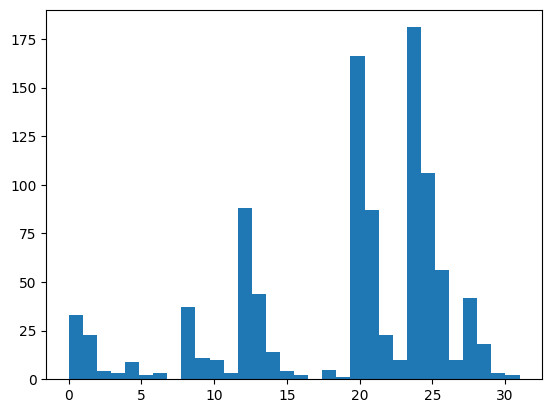

In [70]:
# Running simulator S 1000 times on measure.circuit
# x axis is in decimal notation
_ = plt.hist(measured, bins=32)

In [71]:
MB.ReadAndRunCircuit(measureInput, )

TypeError: MB.ReadAndRunCircuit() missing 1 required positional argument: 'startstate'